## AUS RAINFALL PREDICTION

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [142]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Devesh Atole\Desktop\ML\MLearing data\rain_prdict\weatherAUS.csv") ##c Importing data
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

## data is from  year 2008-2017 

In [4]:
df.sample(5)

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
115032  2010-02-17  PearceRAAF     20.8     35.7       0.0          NaN   
272     2009-08-30      Albury      6.3     11.1      13.4          NaN   
73733   2014-01-26        Nhil      9.8     32.1       0.0          NaN   
75411   2010-03-08    Portland     10.8     22.1       1.2          4.6   
144696  2015-05-24       Uluru      9.6     21.1       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
115032      10.0           E           52.0          E  ...        57.0   
272          NaN         WNW           56.0          W  ...        77.0   
73733        NaN           E           33.0          E  ...        51.0   
75411        5.2           W           56.0        NNW  ...        87.0   
144696       NaN           E           26.0        ESE  ...        36.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
115032         24.0       1014.8       1011.6       5.0       1.0     24.5   
272            57.0       1014.2       1015.2       8.0       8.0      6.7   
73733          16.0       1021.5       1018.0       NaN       NaN     16.4   
75411          62.0       1003.8       1002.5       3.0       7.0     13.6   
144696         23.0       1023.2       1020.9       8.0       8.0     14.2   

        Temp3pm  RainToday  RainTomorrow  
115032     34.7         No            No  
272        10.7        Yes           Yes  
73733      29.0         No            No  
75411      19.1        Yes           Yes  
144696     20.3         No            No  

[5 rows x 23 columns]

In [5]:
df.info()          ## TO CHECK DATA TYPES AND MISSING DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.shape    ## FOR NO OF ROWS AND COLUMNS

(145460, 23)

In [7]:
df.isna().sum()   ## CHECKING IF THERE IS ANY MISSING VALUES IN DATA 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

THERE ARE MANY MISSING VALUES IN DATA 

1. WE CAN REPLACE IT 
2. WE CAN DELETE SMALL MISSING DATA BECAUSE WE HABE LARGE DATA SET 

In [8]:
df.duplicated().sum()           ## WE DONT HAVE DUPLICATE RECORDS

0

In [9]:
df.describe()


MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [10]:
df.describe(include="O")       

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [11]:
df["Date"]=pd.to_datetime(df["Date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Converting Date column in DAY-MONTH-YEAR COLUMNS

In [13]:
df['year'] =df.Date.dt.year
df['month'] =df.Date.dt.month


In [14]:
df['day'] =df.Date.dt.day


In [16]:
df=df.drop(columns=["Date"],axis=1)

In [17]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [18]:
df['RainTomorrow'].value_counts() ## CHECKING ON TARGET COLUMN 

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

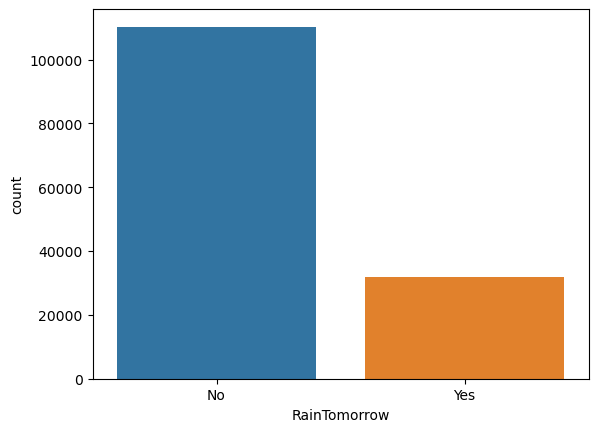

In [19]:
sns.countplot(x='RainTomorrow',data=df)                     ## CHECKING ITS DISTRIBUTION

Text(0.5, 0, 'Years')

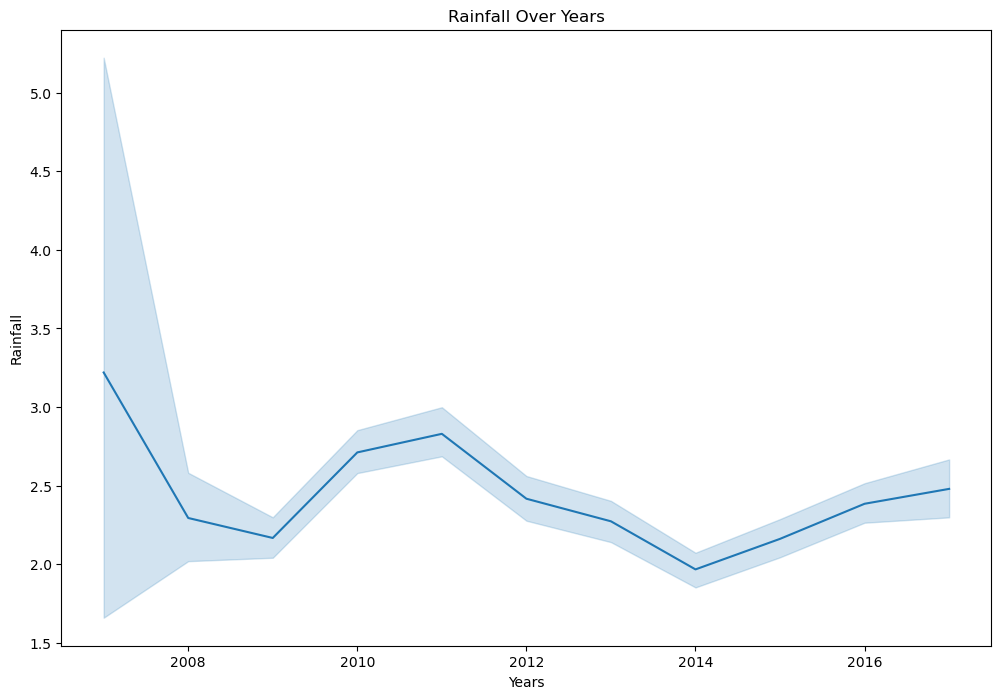

In [20]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
rainfall_over_year=sns.lineplot(x='year',y="Rainfall",data=df)
rainfall_over_year.set_title("Rainfall Over Years")
rainfall_over_year.set_ylabel("Rainfall")
rainfall_over_year.set_xlabel("Years")

In [21]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [22]:
df["Evaporation"].isna().sum()

62790

In [49]:
for i in df.columns:
    if df[i].dtypes=="O":
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
        
print(df)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          4.8       8.4   
1        Albury      7.4     25.1       0.0          4.8       8.4   
2        Albury     12.9     25.7       0.0          4.8       8.4   
3        Albury      9.2     28.0       0.0          4.8       8.4   
4        Albury     17.5     32.3       1.0          4.8       8.4   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          4.8       8.4   
145456    Uluru      3.6     25.3       0.0          4.8       8.4   
145457    Uluru      5.4     26.9       0.0          4.8       8.4   
145458    Uluru      7.8     27.0       0.0          4.8       8.4   
145459    Uluru     14.9     22.6       0.0          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
0                W           44.0          W        WNW  ...       1007.1   
1    

In [50]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

## FILLED THE EMPTY VALUES 

Text(0, 0.5, 'WindSpeed3pm')

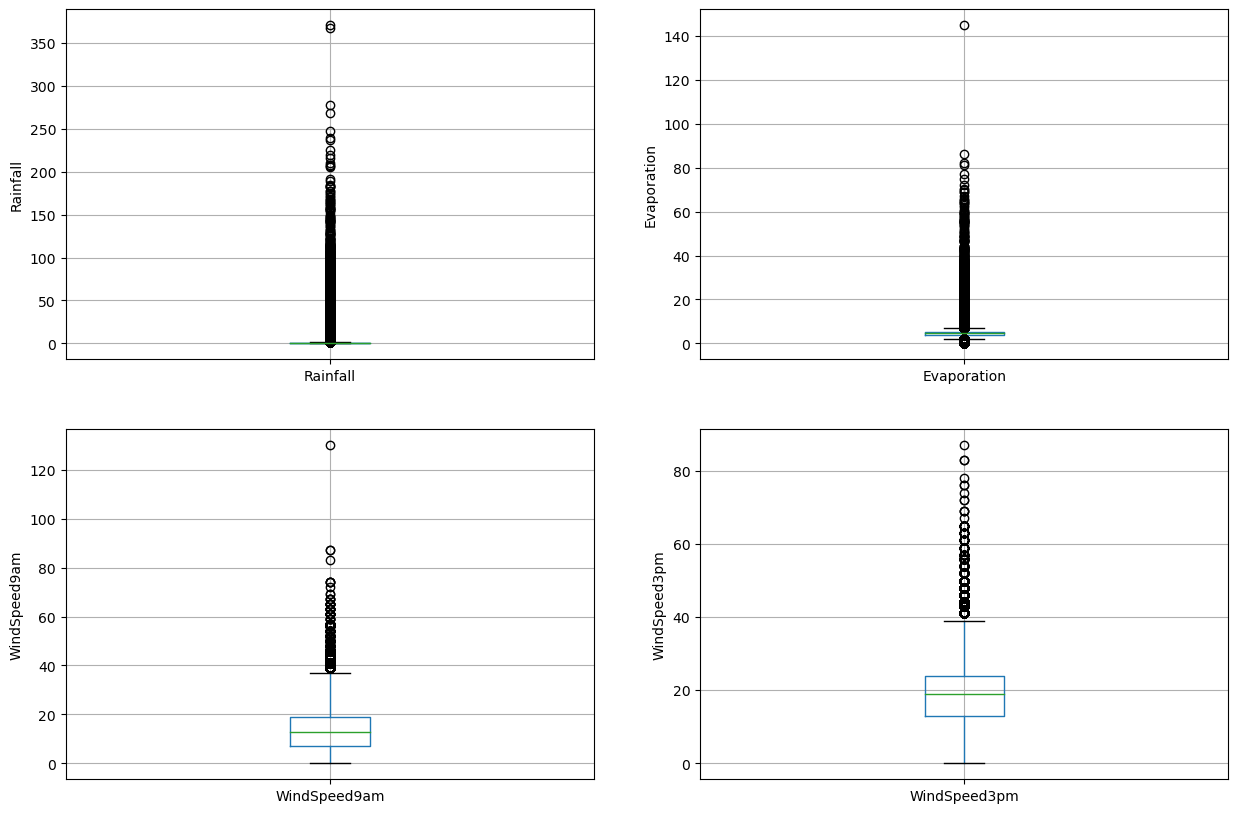

In [58]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

DATA PREPROCESSING
DATA PREPROCESSING
Steps involved in Data Preprocessing:

Label encoding columns with categorical data
Perform the scaling of the features
Detecting outliers
Dropping the outliers based on data analysis

In [62]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="O":
        df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [63]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6          4.8       8.4           13   
1         2      7.4     25.1       0.0          4.8       8.4           14   
2         2     12.9     25.7       0.0          4.8       8.4           15   
3         2      9.2     28.0       0.0          4.8       8.4            4   
4         2     17.5     32.3       1.0          4.8       8.4           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       5.0   
2           46.0          13          15  ...       1008.7       5.0   
3           24.0           9           0  ...       1012.8       5.0   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0       5.0     16.9     21.8          0             0  2008     12    1  
1       5.0     17.2     24.3          0             0  2008     12    2  
2       2.0     21.0     23.2          0             0  2008     12    3  
3       5.0     18.1     26.5          0             0  2008     12    4  
4       8.0     17.8     29.7          0             0  2008     12    5  

[5 rows x 25 columns]

In [106]:
X=df

In [107]:
y1=X["RainTomorrow"]

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1=sc.fit_transform(X)


In [112]:
X1

array([[-1.53166617,  0.18975691, -0.0445749 , ..., -1.87957524,
         1.6340755 , -1.67284386],
       [-1.53166617, -0.75278601,  0.26579424, ..., -1.87957524,
         1.6340755 , -1.55913977],
       [-1.53166617,  0.11121166,  0.35044037, ..., -1.87957524,
         1.6340755 , -1.44543568],
       ...,
       [ 1.20928479, -1.06696699,  0.51973264, ...,  1.66697818,
        -0.11659932,  0.8286461 ],
       [ 1.20928479, -0.68994982,  0.53384032, ...,  1.66697818,
        -0.11659932,  0.94235019],
       [ 1.20928479,  0.42539264, -0.08689797, ...,  1.66697818,
        -0.11659932,  1.05605428]])

In [113]:
x1 = pd.DataFrame(X1, columns=X.columns) 

In [114]:
x1

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      -1.531666  0.189757 -0.044575 -0.203581    -0.119472   0.14871   
1      -1.531666 -0.752786  0.265794 -0.275097    -0.119472   0.14871   
2      -1.531666  0.111212  0.350440 -0.275097    -0.119472   0.14871   
3      -1.531666 -0.470023  0.674917 -0.275097    -0.119472   0.14871   
4      -1.531666  0.833828  1.281548 -0.155903    -0.119472   0.14871   
...          ...       ...       ...       ...          ...       ...   
145455  1.209285 -1.475402  0.025964 -0.275097    -0.119472   0.14871   
145456  1.209285 -1.349730  0.294010 -0.275097    -0.119472   0.14871   
145457  1.209285 -1.066967  0.519733 -0.275097    -0.119472   0.14871   
145458  1.209285 -0.689950  0.533840 -0.275097    -0.119472   0.14871   
145459  1.209285  0.425393 -0.086898 -0.275097    -0.119472   0.14871   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0          1.045228       0.307739    1.328766    1.366458  ...    -1.223012   
1          1.258262       0.307739   -0.221338    1.586813  ...    -1.117969   
2          1.471296       0.460168    1.328766    1.586813  ...    -0.982915   
3         -0.872075      -1.216548    0.442992   -1.718521  ...    -0.367666   
4          1.045228       0.079096   -1.328556   -0.176032  ...    -1.388078   
...             ...            ...         ...         ...  ...          ...   
145455    -1.724209      -0.683048    0.442992   -1.498165  ...     0.757789   
145456    -0.446007      -1.368977    0.442992   -1.057454  ...     0.577716   
145457    -1.085108      -0.225761    0.442992    1.366458  ...     0.232577   
145458     0.193094      -0.911691    0.664436   -1.057454  ...     0.187559   
145459     1.045228      -0.073333   -1.107113   -1.277810  ...     0.397644   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0       1.464068  0.137693 -0.013506  0.019135  -0.529795     -0.529764   
1       0.149133  0.137693  0.033011  0.384064  -0.529795     -0.529764   
2       0.149133 -1.286294  0.622225  0.223495  -0.529795     -0.529764   
3       0.149133  0.137693  0.172562  0.705202  -0.529795     -0.529764   
4       1.025756  1.561680  0.126045  1.172312  -0.529795     -0.529764   
...          ...       ...       ...       ...        ...           ...   
145455  0.149133  0.137693 -1.067887  0.106718  -0.529795     -0.529764   
145456  0.149133  0.137693 -0.943842  0.413259  -0.529795     -0.529764   
145457  0.149133  0.137693 -0.695753  0.646814  -0.529795     -0.529764   
145458 -0.727490 -1.286294 -0.292607  0.632217  -0.529795     -0.529764   
145459  1.464068  1.561680 -0.308112 -0.112240  -0.529795     -0.529764   

            year     month       day  
0      -1.879575  1.634076 -1.672844  
1      -1.879575  1.634076 -1.559140  
2      -1.879575  1.634076 -1.445436  
3      -1.879575  1.634076 -1.331732  
4      -1.879575  1.634076 -1.218028  
...          ...       ...       ...  
145455  1.666978 -0.116599  0.601238  
145456  1.666978 -0.116599  0.714942  
145457  1.666978 -0.116599  0.828646  
145458  1.666978 -0.116599  0.942350  
145459  1.666978 -0.116599  1.056054  

[145460 rows x 25 columns]

In [87]:
x1.describe().T

count          mean       std       min       25%       50%  \
Location       145460.0  7.815677e-18  1.000003 -1.672228 -0.899139  0.014511   
MinTemp        145460.0 -4.501830e-16  1.000003 -3.250525 -0.705659 -0.030170   
MaxTemp        145460.0  3.001220e-16  1.000003 -3.952405 -0.735852 -0.086898   
Rainfall       145460.0  7.815677e-18  1.000003 -0.275097 -0.275097 -0.275097   
Evaporation    145460.0 -3.282584e-17  1.000003 -1.629472 -0.371139 -0.119472   
Sunshine       145460.0 -5.424080e-16  1.000003 -2.897217  0.076188  0.148710   
WindGustDir    145460.0  6.252542e-18  1.000003 -1.724209 -0.872075  0.193094   
WindGustSpeed  145460.0  1.824961e-16  1.000003 -2.588407 -0.683048 -0.073333   
WindDir9am     145460.0  7.190423e-17  1.000003 -1.550000 -0.885669  0.000105   
WindDir3pm     145460.0  8.284618e-17  1.000003 -1.718521 -0.837098  0.044324   
WindSpeed9am   145460.0  5.627287e-17  1.000003 -1.583291 -0.793380 -0.116314   
WindSpeed3pm   145460.0  6.565169e-17  1.000003 -2.141841 -0.650449  0.037886   
Humidity9am    145460.0  2.250915e-16  1.000003 -3.654212 -0.631189  0.058273   
Humidity3pm    145460.0 -8.440931e-17  1.000003 -2.518329 -0.710918  0.021816   
Pressure9am    145460.0 -4.314254e-16  1.000003 -5.520544 -0.616005 -0.006653   
Pressure3pm    145460.0  5.027043e-15  1.000003 -5.724832 -0.622769 -0.007520   
Cloud9am       145460.0 -1.016038e-16  1.000003 -2.042425 -0.727490  0.149133   
Cloud3pm       145460.0  7.346736e-17  1.000003 -2.235619 -0.336969  0.137693   
Temp9am        145460.0  7.503050e-17  1.000003 -3.750358 -0.726764 -0.044517   
Temp3pm        145460.0 -6.877796e-17  1.000003 -3.951301 -0.725322 -0.083046   
RainToday      145460.0 -8.988029e-18  1.000003 -0.529795 -0.529795 -0.529795   
RainTomorrow   145460.0 -1.289587e-17  1.000003 -0.529764 -0.529764 -0.529764   
year           145460.0  2.080221e-14  1.000003 -2.273637 -0.697391  0.090732   
month          145460.0 -1.558739e-16  1.000003 -1.575495 -0.991937 -0.116599   
day            145460.0  2.258609e-17  1.000003 -1.672844 -0.876915  0.032717   

                    75%        max  
Location       0.857881   1.701250  
MinTemp        0.723865   3.410112  
MaxTemp        0.703133   3.510563  
Rainfall      -0.203581  43.945571  
Evaporation    0.006361  43.985108  
Sunshine       0.257494   2.360634  
WindGustDir    1.045228   1.471296  
WindGustSpeed  0.460168   7.243246  
WindDir9am     0.885879   1.771653  
WindDir3pm     0.925747   1.586813  
WindSpeed9am   0.560752  13.086472  
WindSpeed3pm   0.611499   7.839016  
Humidity9am    0.747734   1.649338  
Humidity3pm    0.656852   2.366565  
Pressure9am    0.617561   3.471111  
Pressure3pm    0.622735   3.653960  
Cloud9am       0.587445   1.902380  
Cloud3pm       0.612356   2.036343  
Temp9am        0.699753   3.599302  
Temp3pm        0.661411   3.653834  
RainToday     -0.529795   1.887521  
RainTomorrow  -0.529764   1.887635  
year           0.878855   1.666978  
month          0.758738   1.634076  
day            0.828646   1.738279

In [115]:
x1["RainTomorrow"]=y1

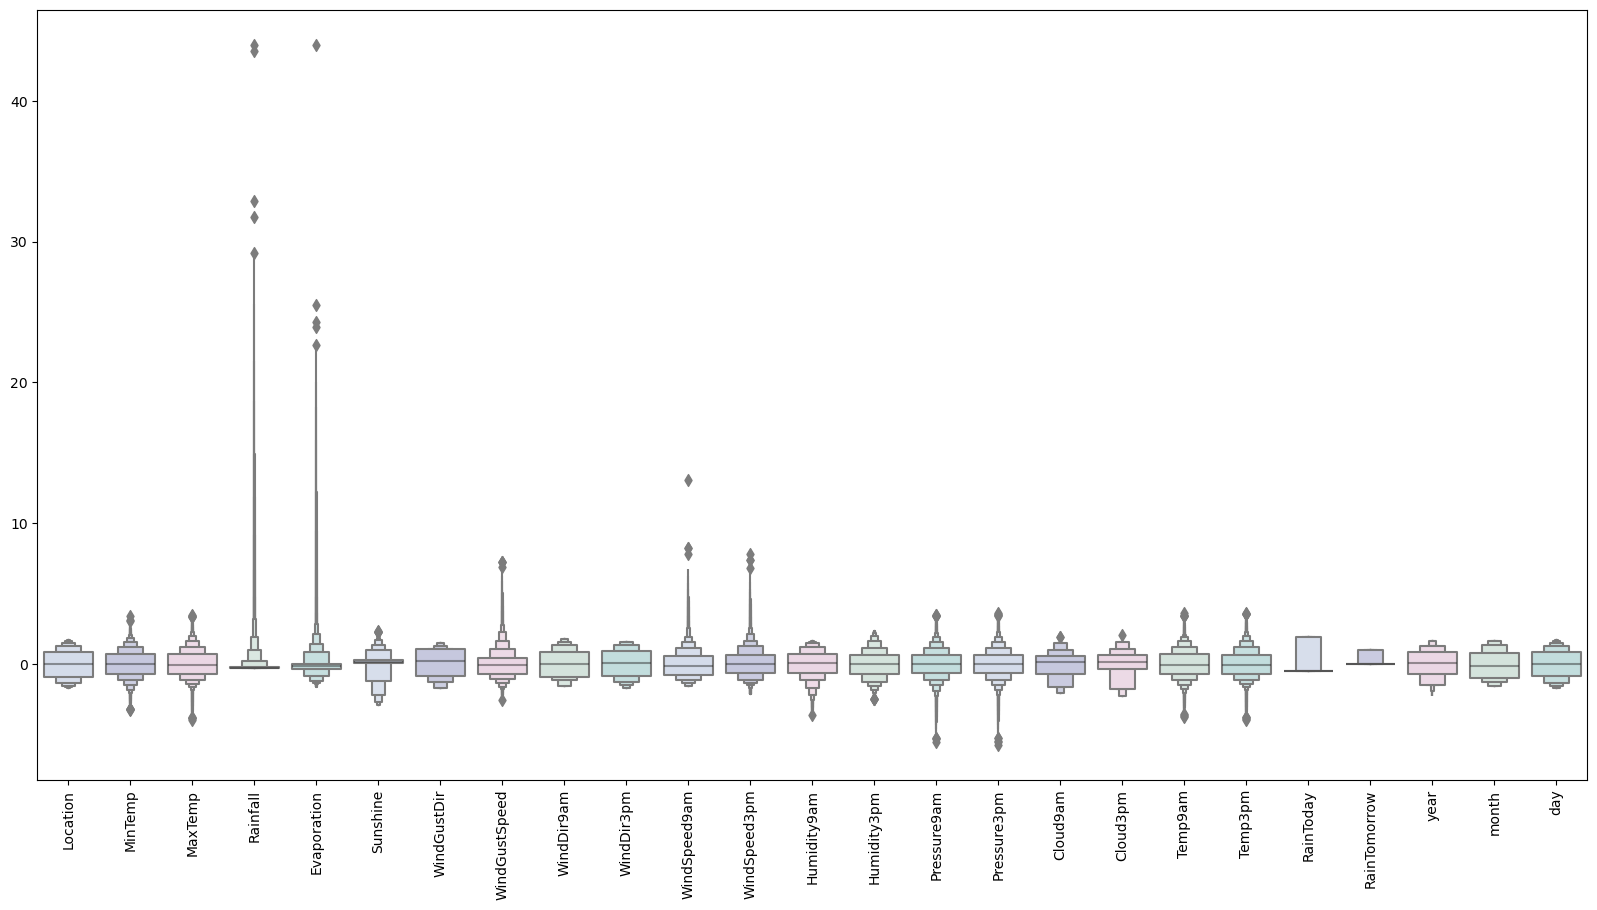

In [116]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = x1,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [117]:

#Dropping with outlier

x1 = x1[(x1["MinTemp"]<2.3)&(x1["MinTemp"]>-2.3)]
x1 = x1[(x1["MaxTemp"]<2.3)&(x1["MaxTemp"]>-2)]
x1 = x1[(x1["Rainfall"]<4.5)]
x1 = x1[(x1["Evaporation"]<2.8)]
x1 = x1[(x1["Sunshine"]<2.1)]
x1 = x1[(x1["WindGustSpeed"]<4)&(x1["WindGustSpeed"]>-4)]
x1 = x1[(x1["WindSpeed9am"]<4)]
x1 = x1[(x1["WindSpeed3pm"]<2.5)]
x1 = x1[(x1["Humidity9am"]>-3)]
x1 = x1[(x1["Humidity3pm"]>-2.2)]
x1 = x1[(x1["Pressure9am"]< 2)&(x1["Pressure9am"]>-2.7)]
x1 = x1[(x1["Pressure3pm"]< 2)&(x1["Pressure3pm"]>-2.7)]
x1 = x1[(x1["Cloud9am"]<1.8)]
x1 = x1[(x1["Cloud3pm"]<2)]
x1 = x1[(x1["Temp9am"]<2.3)&(x1["Temp9am"]>-2)]
x1 = x1[(x1["Temp3pm"]<2.3)&(x1["Temp3pm"]>-2)]



In [118]:
x1.shape

(127536, 25)

In [119]:
df.shape 

(145460, 25)

In [120]:
## we LOST 17924 records beacuse of outlier
# AFTER REMOVING OUTLER

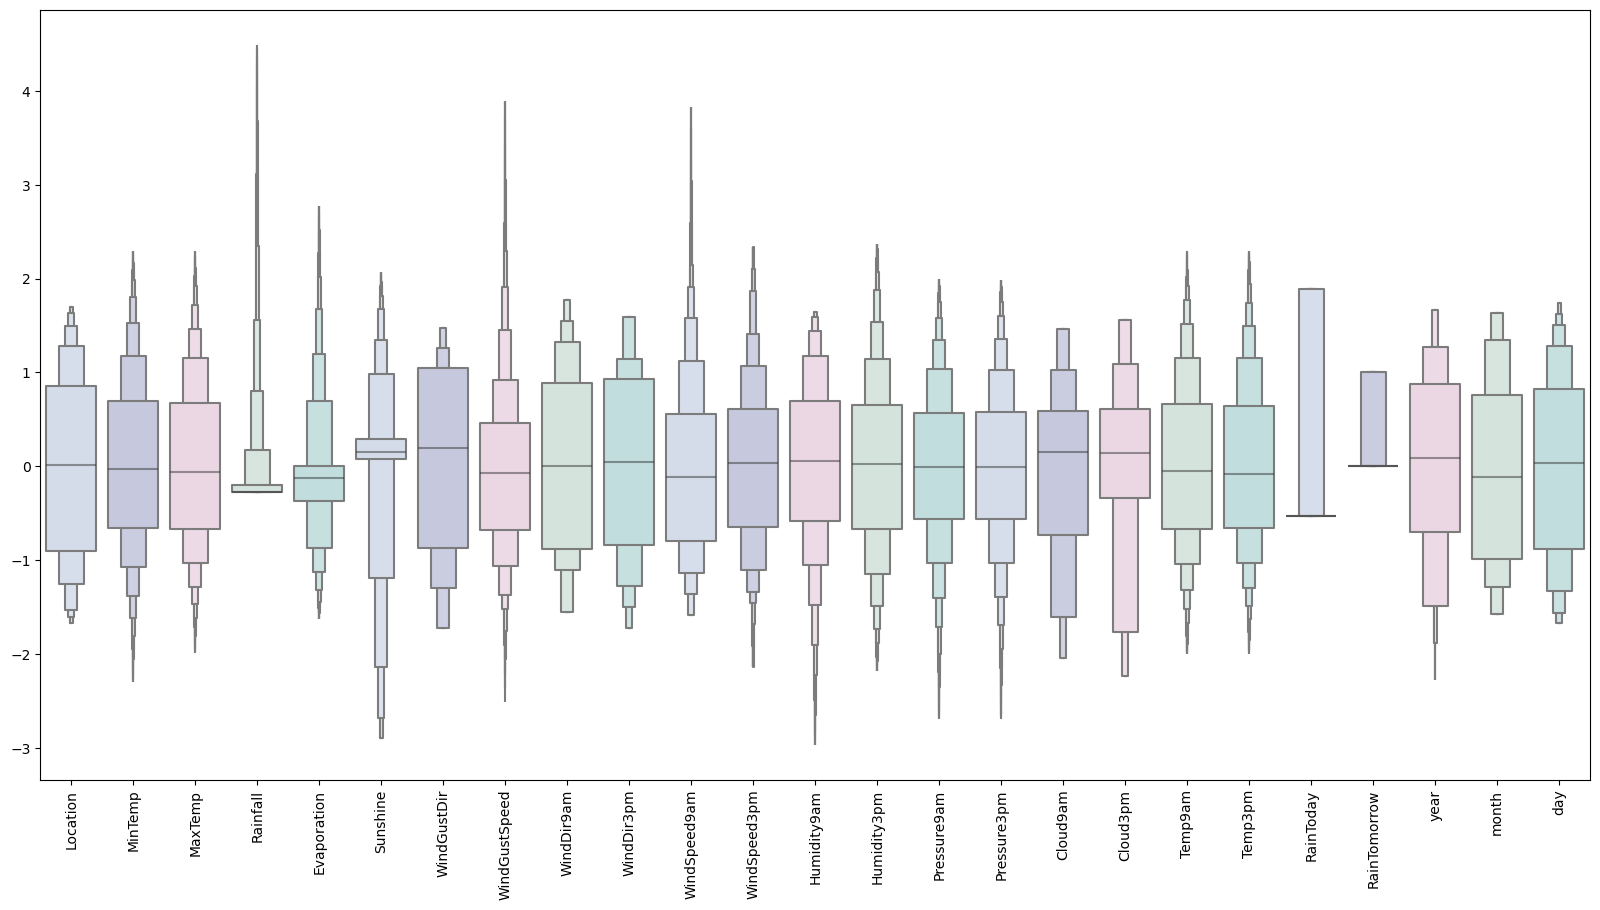

In [121]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = x1,palette = colours)
plt.xticks(rotation=90)
plt.show()

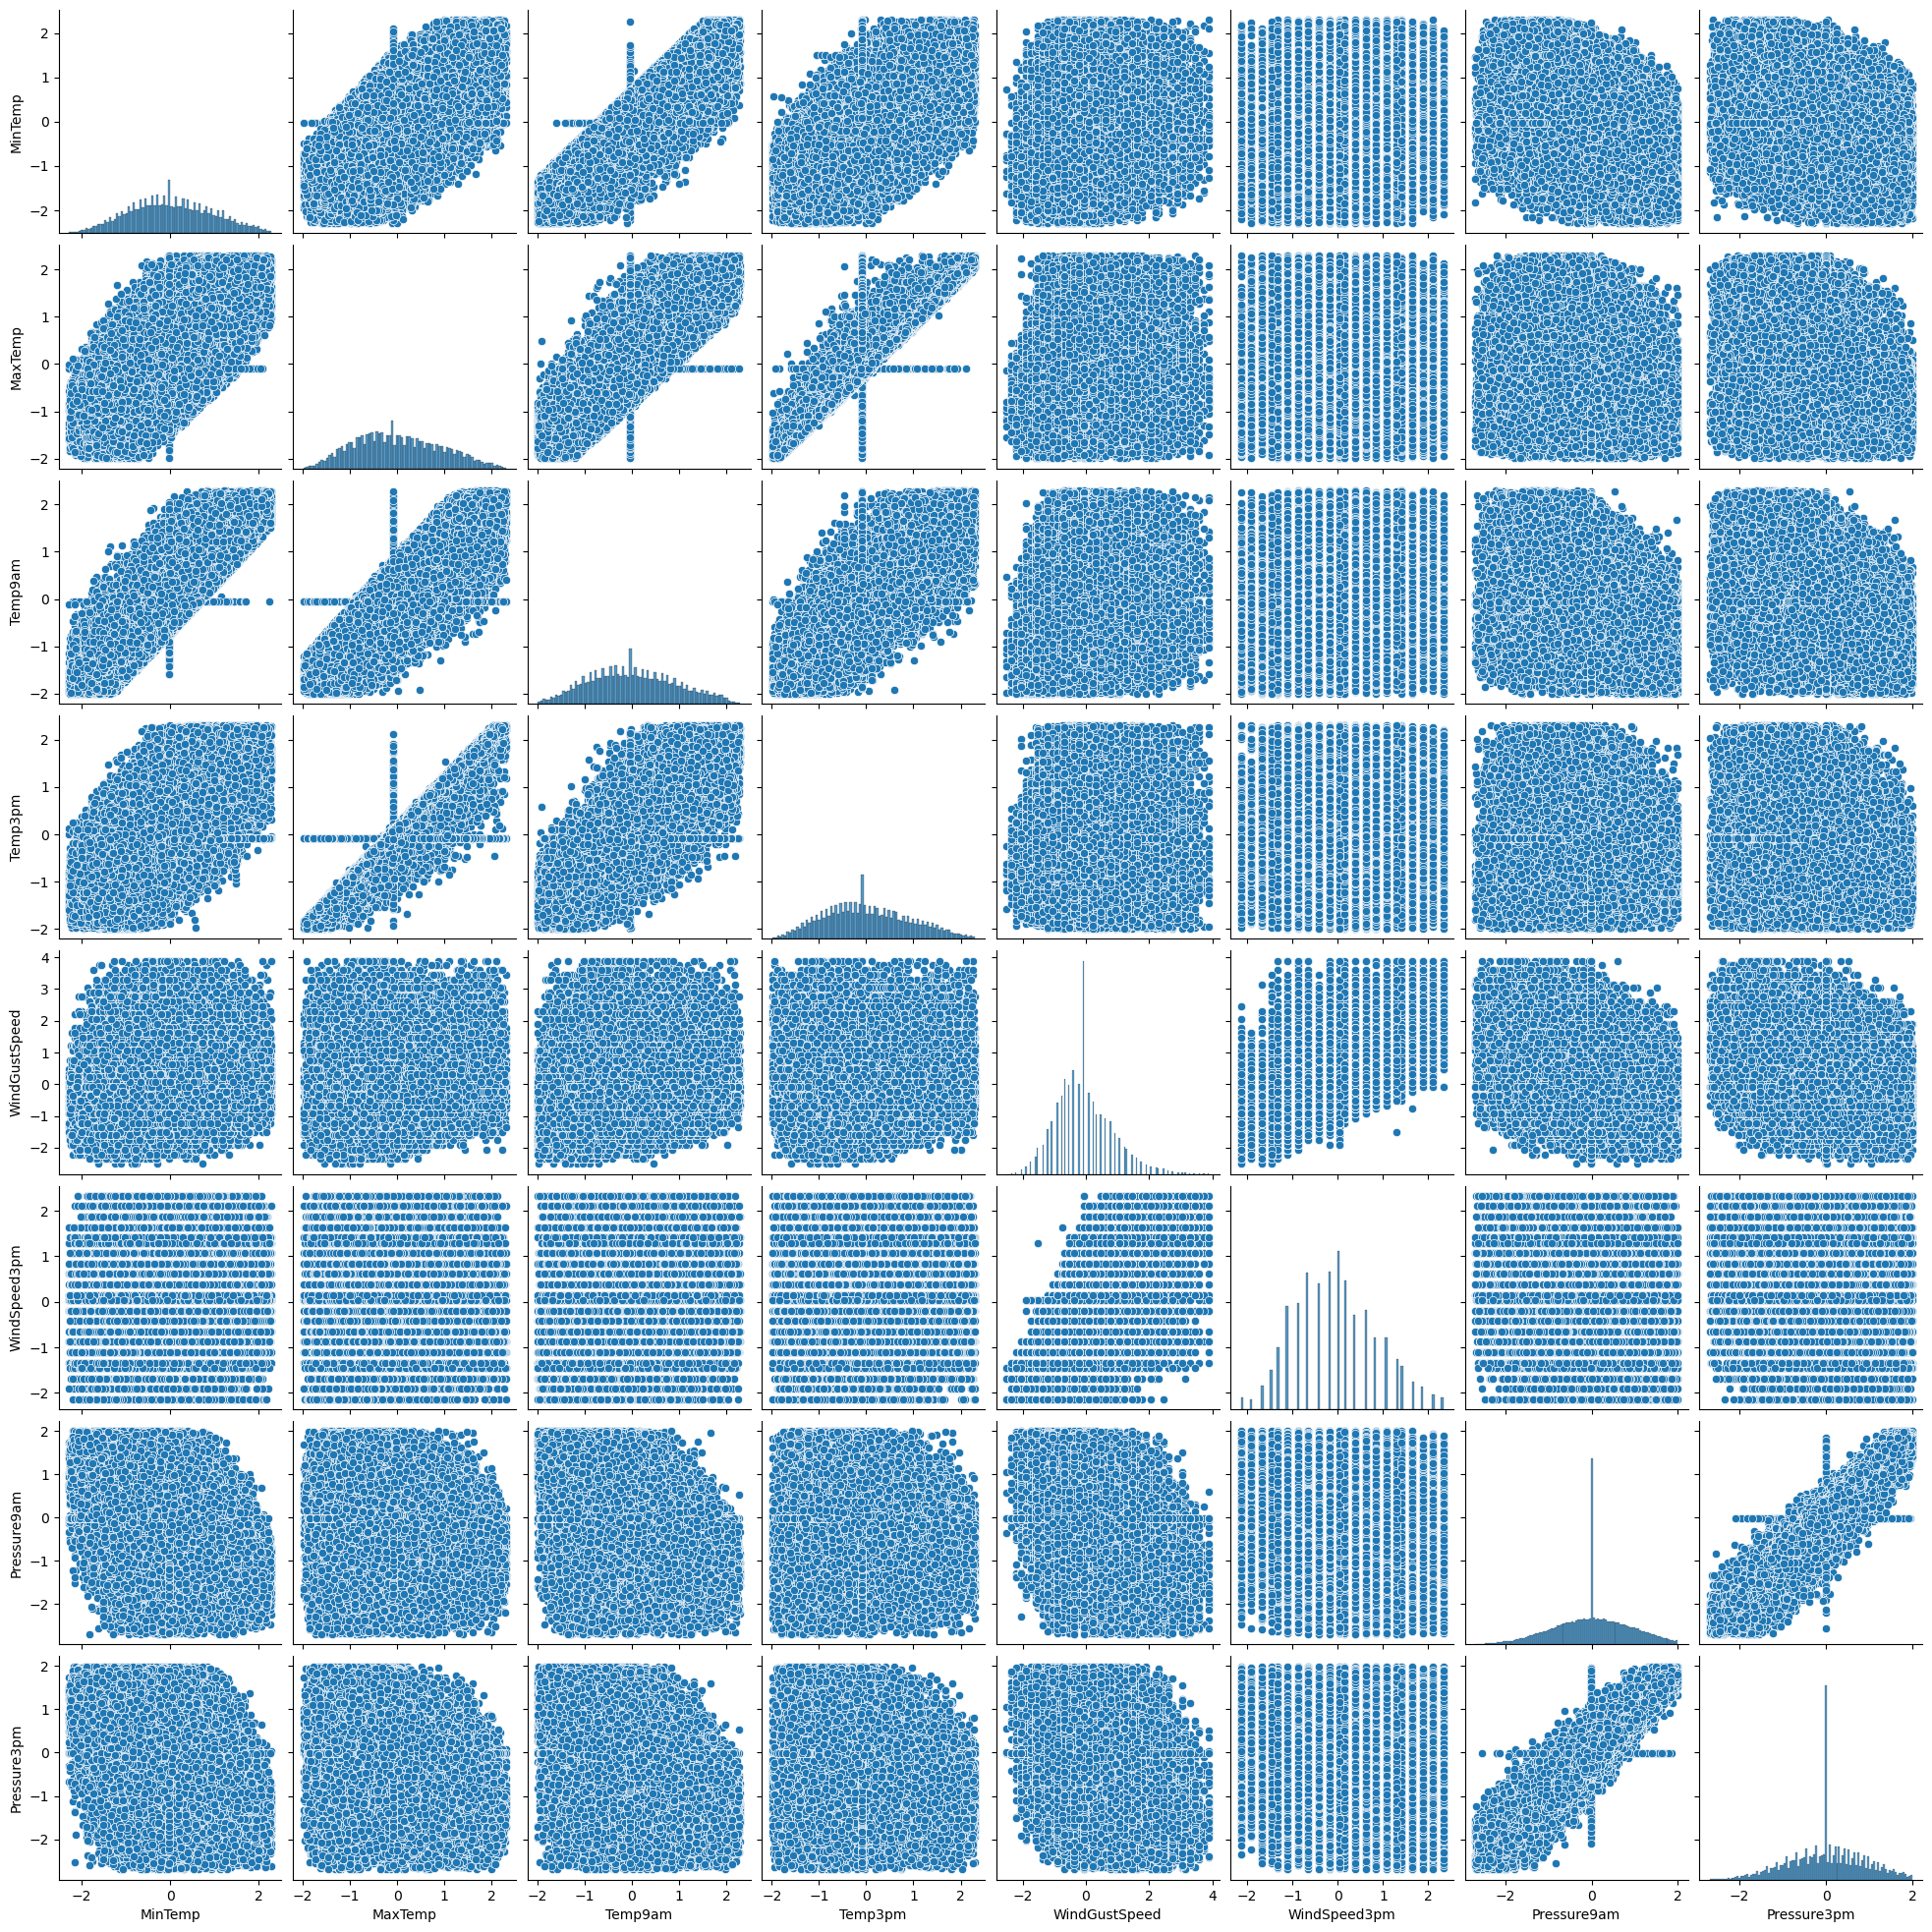

In [143]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(x1[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

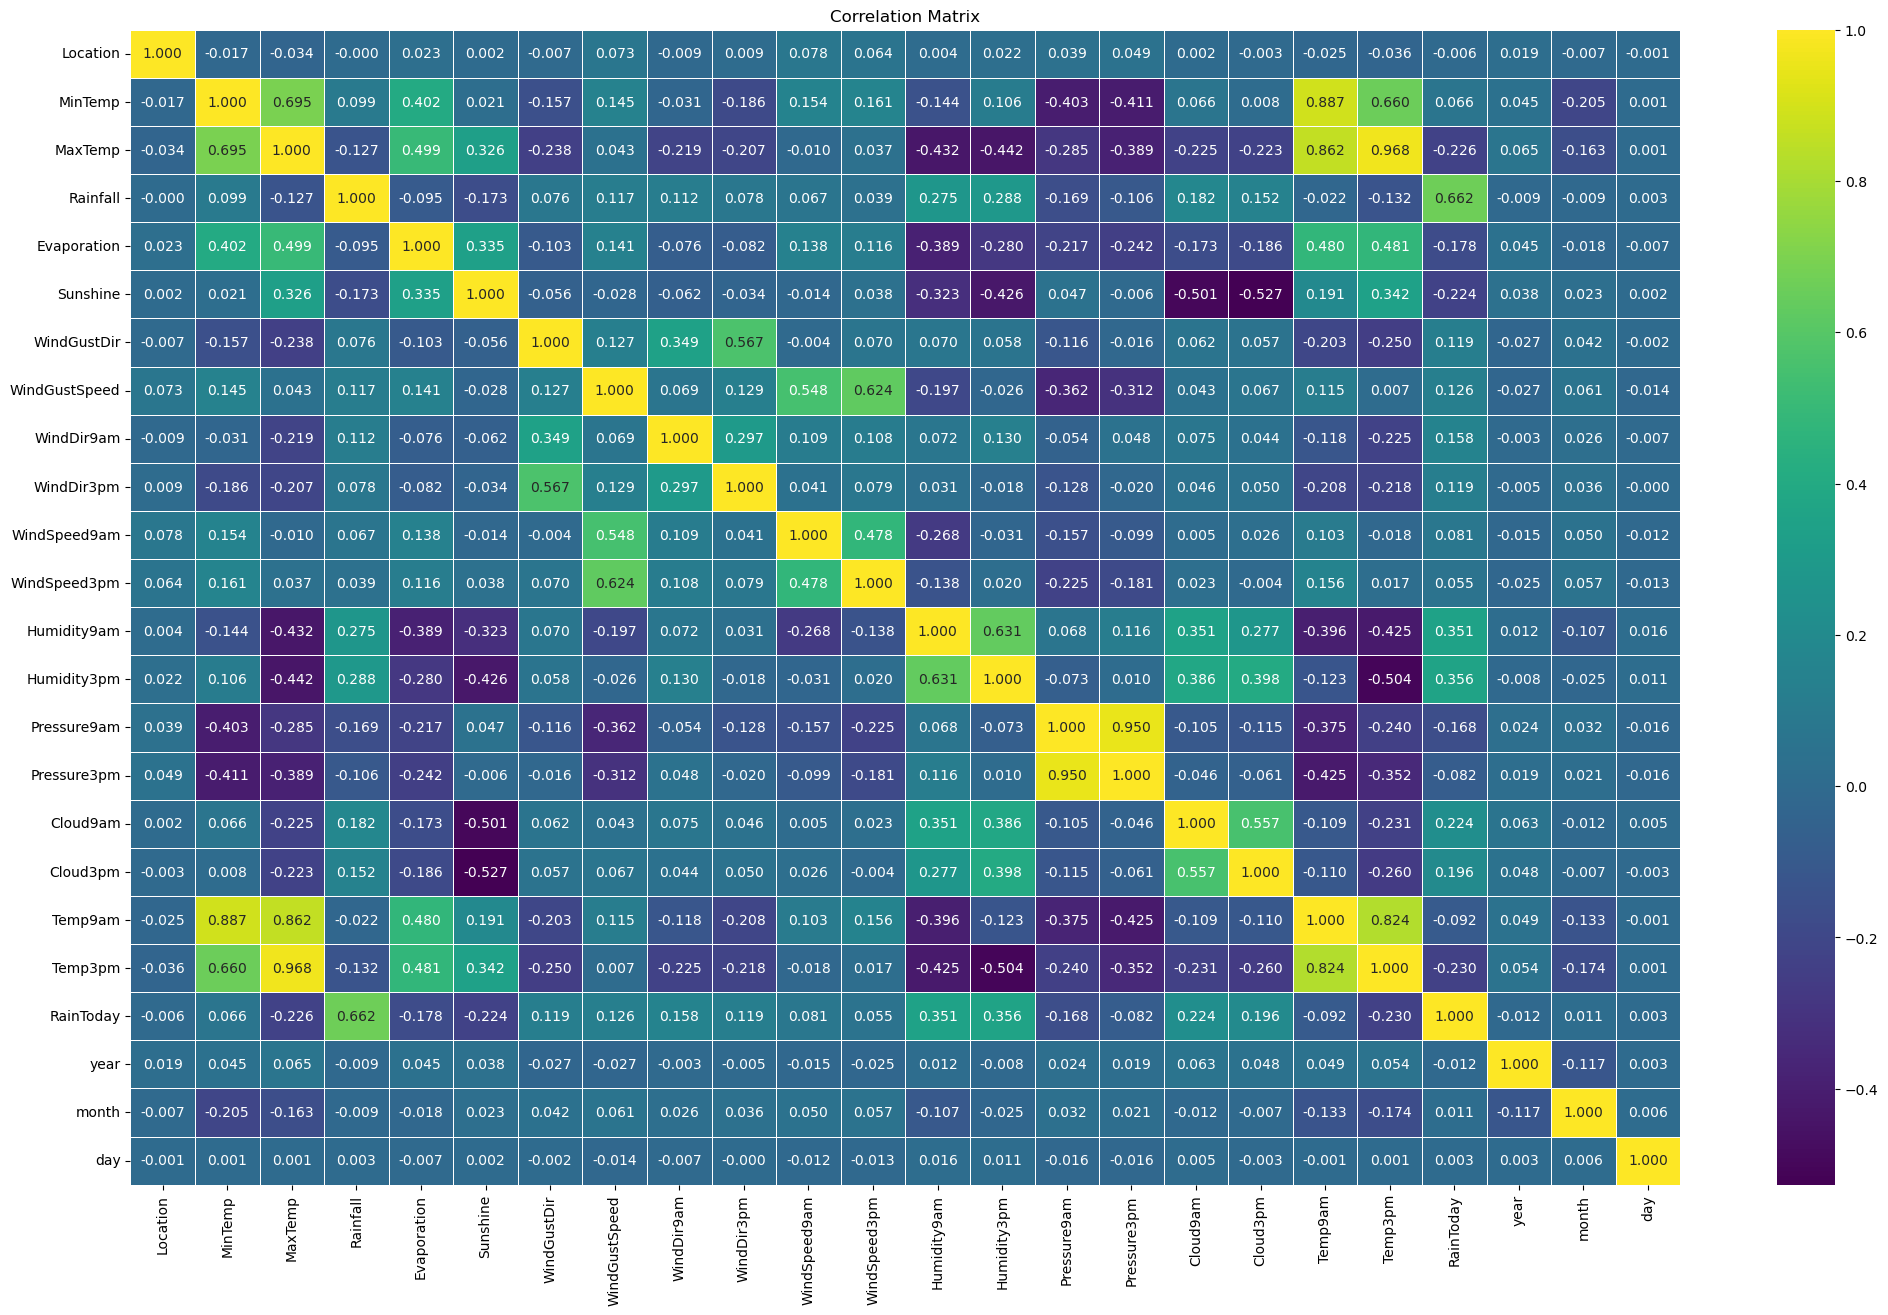

In [144]:
plt.figure(figsize = (25, 15))
plt.title('Correlation Matrix')
sns.heatmap(x1.corr(), cmap = 'viridis', annot = True,  linecolor = 'white', linewidths = 0.5, fmt = '.3f')

In [122]:
y=x1["RainTomorrow"]
x1=x1.drop("RainTomorrow",axis=1)

In [123]:
from sklearn.model_selection import train_test_split
# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 42)


In [124]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
lr = LogisticRegression()



In [125]:
logistic_model=lr.fit(X_train,y_train)

In [126]:
y_pred=logistic_model.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [128]:
accuracy_score(y_pred,y_test)

0.844440959698918

In [129]:
confusion_matrix(y_pred,y_test)

array([[18993,  2851],
       [ 1117,  2547]], dtype=int64)

In [131]:
print(classification_report(y_pred,y_test))              #### BY LogisticRegression  MODEL ACCURACY IS 85.52%

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     21844
           1       0.47      0.70      0.56      3664

    accuracy                           0.84     25508
   macro avg       0.71      0.78      0.73     25508
weighted avg       0.88      0.84      0.86     25508



In [132]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

In [134]:
adb=AdaBoostClassifier()
abd_model=adb.fit(X_train,y_train)     

In [157]:
#Y_pred_byABD=abd_model.predict(X_test)                            ## BY AdaBoostClassifier MODEL ACCURACY IS 84.58%
print(accuracy_score(Y_pred_byABD,y_test))
print(confusion_matrix(Y_pred_byABD,y_test))

print(classification_report(Y_pred_byABD,y_test))

0.8457346714756155
[[19067  2892]
 [ 1043  2506]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     21959
           1       0.46      0.71      0.56      3549

    accuracy                           0.85     25508
   macro avg       0.71      0.79      0.73     25508
weighted avg       0.88      0.85      0.86     25508



In [137]:
rf=RandomForestClassifier()                       ## BY Random_forest MODEL ACCURACY IS 86%
rf_model=rf.fit(X_train,y_train)

In [156]:
#Y_pred_RF=rf_model.predict(X_test)
print(accuracy_score(Y_pred_RF,y_test))
print(confusion_matrix(Y_pred_RF,y_test))

print(classification_report(Y_pred_RF,y_test))

0.8551826877842246
[[19209  2793]
 [  901  2605]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     22002
           1       0.48      0.74      0.59      3506

    accuracy                           0.86     25508
   macro avg       0.72      0.81      0.75     25508
weighted avg       0.89      0.86      0.87     25508



In [139]:
L_svm=LinearSVC(dual=False,random_state=250)         ## ## BY Linier support vector MODEL ACCURACY IS 84.47%
L_svm=LinearSVC(dual=False,random_state=250)         
L_svm_model=L_svm.fit(X_train,y_train)

In [155]:
#Y_pred_L_svm=L_svm_model.predict(X_test)
print(accuracy_score(Y_pred_L_svm,y_test))
print(confusion_matrix(Y_pred_L_svm,y_test))

print(classification_report(Y_pred_L_svm,y_test))

0.8447153834091266
[[19126  2977]
 [  984  2421]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     22103
           1       0.45      0.71      0.55      3405

    accuracy                           0.84     25508
   macro avg       0.70      0.79      0.73     25508
weighted avg       0.88      0.84      0.86     25508



In [147]:
target=pd.DataFrame(y_test)

In [153]:
target["Y_pred_byABD"]=Y_pred_byABD

In [160]:
target.head(50)

RainTomorrow  Y_pred_LR  Y_pred_LSVM  Y_pred_RF  Y_pred_byABD
29216              0          0            0          0             0
3161               0          0            0          0             0
91941              0          0            0          0             0
105297             1          1            1          1             0
12787              0          0            0          0             0
139424             0          0            0          0             0
46403              0          0            0          0             0
76479              0          0            0          0             0
138655             0          0            0          0             0
19526              0          0            0          0             1
79515              0          0            0          0             0
85282              1          1            1          1             1
19317              0          0            0          0             0
81085              0          0            0          0             0
127135             1          0            0          0             0
21488              0          0            0          0             0
65949              0          0            0          0             0
109558             0          0            0          0             0
130678             0          0            0          0             0
114938             0          0            0          0             0
121839             0          0            0          0             0
139280             1          1            1          1             1
8770               0          0            0          0             0
122362             0          0            0          0             0
9769               1          0            0          0             1
145149             0          0            0          0             0
128572             0          0            0          0             0
3730               0          0            0          0             0
88353              1          1            1          1             1
22137              0          0            0          0             0
124908             1          0            0          0             0
57598              0          0            0          0             0
64771              1          1            1          1             1
131251             0          0            0          0             0
49339              1          1            1          1             1
351                0          0            0          0             0
27923              0          0            0          0             0
43946              0          0            0          0             0
61408              0          0            0          0             0
99384              0          0            0          0             0
85475              0          0            0          0             0
140647             0          0            0          0             0
11378              0          0            0          0             0
136119             1          1            0          0             0
118100             0          0            0          0             0
73325              0          0            0          0             0
81246              1          1            1          1             1
58636              1          0            0          0             0
88802              1          1            1          1             1
108610             0          0            0          0             0

In [162]:
print("Logistic R MODEL ACCURACY IS =",accuracy_score(y_pred,y_test))
print("Adaboost MODEL ACCURACY IS =",accuracy_score(Y_pred_byABD,y_test))
print("Random Forest MODEL ACCURACY IS =",accuracy_score(Y_pred_RF,y_test))
print("Linier support vector MODEL ACCURACY IS =",accuracy_score(Y_pred_L_svm,y_test))

Logistic R MODEL ACCURACY IS = 0.844440959698918
Adaboost MODEL ACCURACY IS = 0.8457346714756155
Random Forest MODEL ACCURACY IS = 0.8551826877842246
Linier support vector MODEL ACCURACY IS = 0.8447153834091266
